In [1]:
from RXX import *
from spacemath import *
import matplotlib.pyplot as plt
%matplotlib inline

# 2HDM

## Couplings
In the context of 2HDM-III can define the couplings $g_{htt}$, $g_{hbb}$, $g_{h\tau\tau}$ and $g_{hWW}$

In [2]:
#2HDM-III
def ghtt_2hdm(α,Att,Cab,tb):
    global mW,mt,g,SMvev
    if issymbolic(α,Att,Cab,tb):
        MW,Mt= mW['symbol'],mt['symbol']
        return (g['symbol']/2)*(Mt/MW)*(-sp.cos(α)/tb*sp.cos(sp.atan(tb)) + 
                sp.sqrt(2)*Cab/(g['symbol']*tb*sp.cos(sp.atan(tb)))*(MW/Mt)*(
                    Mt/SMvev['symbol'])*Att)
    else:
        MW,Mt= mW['value'],mt['value']
        return (g['value']/2)*(Mt/MW)*(-np.cos(α)/tb*np.cos(np.arctan(tb)) + 
                np.sqrt(2)*Cab/(g['value']*tb*np.cos(np.arctan(tb)))*(MW/Mt)*(
                    Mt/SMvev['value'])*Att)

symbolic definition of variables

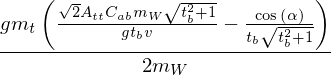

In [3]:
a,Att,Cab,tb = sp.symbols('alpha,A_{tt},C_{ab},t_b')
ghtt_2hdm(a,Att,Cab,tb)

numeric evaluation

In [4]:
ghtt_2hdm(0.1,0.2,0.3,0.4)

In [5]:
def ghbb_2hdm(α,Abb,Cab,tb):
    global mW,mb,g,SMvev
    if issymbolic(α,Abb,Cab,tb):
        MW,Mb= mW['symbol'],mb['symbol']
        return (g['symbol']/2)*(Mb/MW)*(-sp.sin(α)*tb/sp.sin(sp.atan(tb)) + 
                sp.sqrt(2)*(Cab*tb)/(g['symbol']*sp.sin(sp.atan(tb)))*(MW/Mb)*(
                    Mb/SMvev['symbol'])*Abb)
    else:
        MW,Mb= mW['value'],mb['value']
        return (g['value']/2)*(Mb/MW)*(-np.sin(α)*tb/np.sin(np.arctan(tb)) + 
                np.sqrt(2)*(Cab*tb)/(g['value']*np.sin(np.arctan(tb)))*(MW/Mb)*(
                    Mb/SMvev['value'])*Abb)

symbolic evaluation

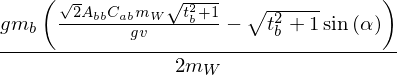

In [6]:
Abb = sp.symbols('A_bb')    
ghbb_2hdm(a,Abb,Cab,tb)

numeric evaluation

In [7]:
ghbb_2hdm(0.1,0.2,0.3,0.4)

In [8]:
def ghtautau_2hdm(α,Atata,Cab,tb):
    global mW,mta,g,SMvev
    if issymbolic(α,Atata,Cab,tb):
        MW,Mtau= mW['symbol'],mta['symbol']
        return (g['symbol']/2)*(Mtau/MW)*(-sp.sin(α)*tb/sp.sin(sp.atan(tb)) + 
                sp.sqrt(2)*(Cab*tb)/(g['symbol']*sp.sin(sp.atan(tb)))*(MW/Mtau)*(
                    Mtau/SMvev['symbol'])*Atata)
    else:
        MW,Mtau= mW['value'],mta['value']
        return (g['value']/2)*(Mtau/MW)*(-np.sin(α)/tb*np.sin(np.arctan(tb)) + 
                np.sqrt(2)*(Cab*tb)/(g['value']*np.sin(np.arctan(tb)))*(MW/Mtau)*(
                    Mtau/SMvev['value'])*Atata)

Atata = sp.symbols(r'A_{\tau\tau}')    
ghtautau_2hdm(a,Atata,Cab,tb)
ghtautau_2hdm(0.1,0.2,0.3,0.4)

In [9]:
def ghww_2hdm(sab):
    global mW,g
    if issymbolic(sab):
        MW,gg= mW['symbol'],g['symbol']
        return gg*MW*sab
    else:
        MW,gg= mW['value'],g['value']
        return gg*MW*sab

sab = sp.symbols('s_{ab}',real=True)
ghww_2hdm(sab)
ghww_2hdm(0.1)

In [10]:
def ghzz_2hdm(sab):
    global mZ,g
    if issymbolic(sab):
        MZ,gg= mZ['symbol'],g['symbol']
        return gg*MZ*sab
    else:
        MZ,gg= mZ['value'],g['value']
        return gg*MZ*sab

#sab = sp.symbols('s_{ab}',real=True)
ghzz_2hdm(sab)
ghzz_2hdm(0.1)

## Signal Strenght functions

Now, we need to define our Higgs streght signals in terms of our variables

In [11]:
rtautau = lambda Cab,tb,Att,Abb: Rtata(
    ghtt_2hdm(np.arccos(Cab) + np.arctan(tb),Att,Cab,tb),
    ghbb_2hdm(np.arccos(Cab) + np.arctan(tb),Abb,Cab,tb),
    ghtautau_2hdm(np.arccos(Cab) + np.arctan(tb),1,Cab,tb))

rbb = lambda Cab,tb,Att,Abb:Rbotbot(
    ghtt_2hdm(np.arccos(Cab) + np.arctan(tb),Att,Cab,tb),
    ghbb_2hdm(np.arccos(Cab) + np.arctan(tb),Abb,Cab,tb))

rgaga = lambda Cab,tb,Att,Abb,mCH:Rgaga(
    ghtt_2hdm(np.arccos(Cab) + np.arctan(tb),Att,Cab,tb),
    ghbb_2hdm(np.arccos(Cab) + np.arctan(tb),Abb,Cab,tb),
    ghww_2hdm(np.sqrt(1 - Cab**2)), 0, mCH)

rww = lambda Cab,tb,Att,Abb:RWW(
    ghtt_2hdm(np.arccos(Cab) + np.arctan(tb),Att,Cab,tb),
    ghbb_2hdm(np.arccos(Cab) + np.arctan(tb),Abb,Cab,tb),
    ghww_2hdm(np.sqrt(1 - Cab**2)))

rzz = lambda Cab,tb,Att,Abb:RWW(
    ghtt_2hdm(np.arccos(Cab) + np.arctan(tb),Att,Cab,tb),
    ghbb_2hdm(np.arccos(Cab) + np.arctan(tb),Abb,Cab,tb),
    ghzz_2hdm(np.sqrt(1 - Cab**2)))

## Allowed parameter space

We calculate the allowed parameter space to each signal

In [15]:
%time
data1s_rtau,data2s_rtau =Rtau.parameter_space2(
    rtautau,n=100000,Cab=[-1.0,1.0],tb=[0.1,5.0],
    Att=[0.0,1.0],Abb=[0.0,1.0])
data1s_rtau

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 9.54 µs


,Cab,tb,Att,Abb,Rtau
0,0.736838,0.146538,0.056901,0.848282,0.942665
1,-0.078033,0.187686,0.870077,0.753592,1.197465
2,-0.757885,0.529742,0.343295,0.834047,0.956737
3,-0.811771,0.442349,0.445366,0.024704,1.266083
4,-0.146876,0.364096,0.487237,0.802967,0.997488
...,...,...,...,...,...
1864,-0.846675,4.170434,0.817024,0.807759,1.185912
1865,-0.235313,0.296698,0.958812,0.860749,1.099764
1866,0.856184,2.912423,0.982248,0.871374,0.971852
1867,0.898084,2.844115,0.982918,0.906029,1.098313


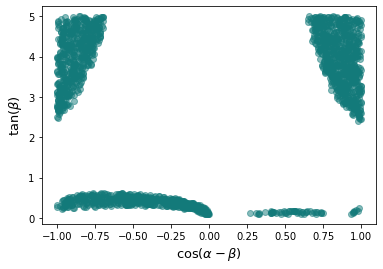

In [16]:
latex_names = {'Cab':r'$\cos(\alpha -\beta)$',
        'tb':r'$\tan(\beta)$',
        'Att':r'$A_{tt}$','Abb':r'$A_{bb}$','Rtau':r'$R_{\tau}$',
        'Rb':r'$R_b$','Rgamma':r'$R_{\gamma}$','Rw':r'$R_{W}$','Rz':r'$R_{Z}$'}
plot_df(data1s_rtau,colx='Cab',coly='tb',
        latex_names=latex_names)

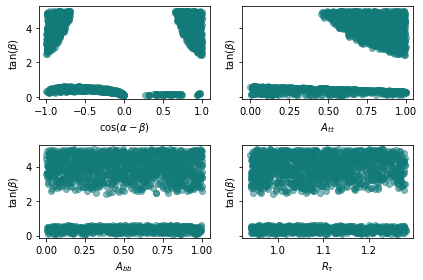

In [19]:
#list(data1s_rtau.keys()).remove('Cab')
plot_tabledf(data1s_rtau,coly='tb',latex_names=latex_names)